In [1]:
# este pedaco de codigo faz com que
# o jupyter notebook mostre multiplos
# outputs numa mesma celula
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Estrutura de Dados do Pandas

- Como vocês já devem ter ouvido falar, aqui no curso ou em qualquer outro lugar, um Cientista/Analista de Dados passa aproximadamente 70% do seu tempo mexendo e arrumando os dados para que eles fiquem coerentes e sejam consumidos por um algoritmo de Machine Learning.
- Para mexer com dados nós usamos Estruturas de Dados. Você já trabalhou com listas, dicionários e tuplas, que são Estruturas de Dados nativas do Python. O Pandas nos oferece duas estruturas avançadas e que são largamente utilizadas na comunidade de Ciência de Dados, elas são o DataFrame e a Series. Vamos aprender a manipulá-las, quanto mais intimidade você ter com elas, mais rápido você ficará no seu trabalho.

## DataFrame
- Há muitas maneiras de se criar um DataFrame, as que mais usaremos é o retorno da função read_csv(), ela retorna um DataFrame, e o retorno de manipulações do próprio DataFrame. Veja o exemplo abaixo:

In [2]:
# import bibliotecas
import pandas as pd

# lendo dados
ender_dados = 'data/amazon.csv'
df_amazonia = pd.read_csv(ender_dados, encoding='latin')

- A saída abaixo é de um DataFrame, ele nada mais é do que uma tabala com duas coordendas, por isso chamamos de bidimensional.
- As duas coordenadas têm nomes, são as:
    - Columns (Column Labels): são as colunas
    - Index (Row Labels): são as linhas
- <font color='red'>IMPORTANTE 1</font>: todas as Columns compartilham o mesmo Index
- <font color='red'>IMPORTANTE 2</font>: os Index não são alterados, a não ser que seja explicitamente dito por você

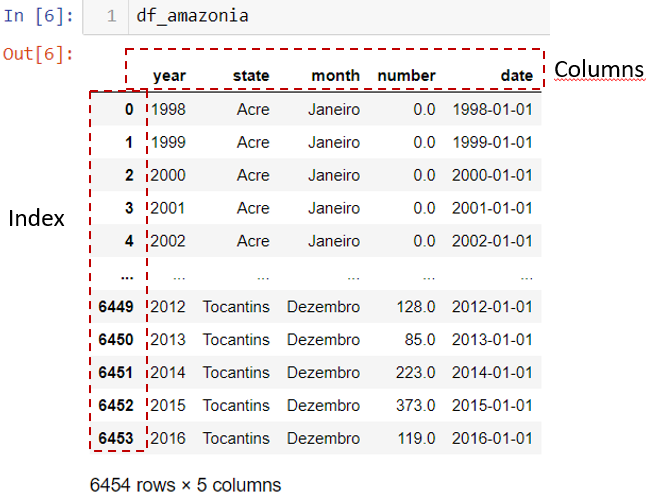

## Series
- Como acontece com o DataFrame também há muitas maneiras de se criar uma Series, as duas que mais usaremos são:
    - 1) Quando acessamos colunas de um DataFrame
    - 2) Retornos de manipulações nas próprias Series ou em em DataFrame
- A Series tem apenas uma coordenada, que é o Index, por isso é chamada de unidimensional
- Abaixo nós retornamos uma Series após acessar a coluna year do DataFrame df_amazonia
- <font color='red'>IMPORTANTE 3</font>: os Index não são alterados, a não ser que seja explicitamente dito por você

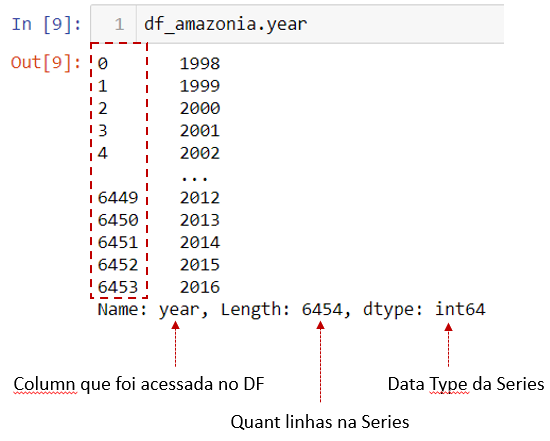

## Operações Vetorizadas e Alinhamento das Labels
- Você já trabalhou com listas em Python, geralmente você tinha que passar por todos os itens de uma dada lista e realizar uma operação, já que a lista não nos permitia algumas coisas. Com a Series isso é diferente, veja o exemplo abaixo com dados sintéticos

In [3]:
# Criando duas listas quaisquer
list_1 = list(range(1, 11, 2))
list_2 = list(range(2, 11, 2))

print('Listas:', '\n', list_1, '\n', list_2)

print('\nSoma das listas:\n', list_1 + list_2)

Listas: 
 [1, 3, 5, 7, 9] 
 [2, 4, 6, 8, 10]

Soma das listas:
 [1, 3, 5, 7, 9, 2, 4, 6, 8, 10]


- Veja que as listas foram concatenadas, mas queríamos somar elemento por elemento. Para isso teríamos que iterar pelos itens das duas listas e retornar o resultado em outra lista, podemos fazer isso com uma list comprehension. Veja o exemplo

In [4]:
# Retornando o que queríamos
[x + y for x, y in zip(list_1, list_2)]

[3, 7, 11, 15, 19]

- Vamos transformar estas duas listas em Series e ver que isso sai naturalmente, sem precisar nenhum passo a mais

In [5]:
# transformando as listas em Series
series_1 = pd.Series(list_1)
series_2 = pd.Series(list_2)

print(f'Visualização da series_1:\n{series_1}')
print(f'\nVisualização da series_2:\n{series_2}')

print(f'\nSoma das Series\n{series_1 + series_2}')

Visualização da series_1:
0    1
1    3
2    5
3    7
4    9
dtype: int64

Visualização da series_2:
0     2
1     4
2     6
3     8
4    10
dtype: int64

Soma das Series
0     3
1     7
2    11
3    15
4    19
dtype: int64


- Outra coisa importante quando você faz operações entre duas Series, elas deixam os Index(Row Labels) alinhados, ele faz as operações entre Series e entre os Index, veja o outro exemplo

In [6]:
# Criando duas Series
series_receita = pd.Series({'2016': 450, '2017': 550, '2018': 650, '2019': 750})
series_custo = pd.Series({'2015': 250, '2016': 350, '2017': 450, '2018': 550})

In [7]:
# Subtraindo uma Series da outra
series_receita - series_custo

2015      NaN
2016    100.0
2017    100.0
2018    100.0
2019      NaN
dtype: float64

- Temos que: 
    - 2015 ocorre somente em series_custo 
    - 2019 ocorre somente em series_receita
    - Esses dois Index são retornados como NaN

- Mesmo se tivéssemos os Index trocados, isso ocorreira. Veja

In [8]:
# Criando duas Series
receita_crescente = pd.Series({'2016': 450, '2017': 550, '2018': 650, '2019': 750})
custo_decrescente = pd.Series({'2018': 550, '2017': 450, '2016': 350, '2015': 250})
receita_crescente
custo_decrescente

2016    450
2017    550
2018    650
2019    750
dtype: int64

2018    550
2017    450
2016    350
2015    250
dtype: int64

In [9]:
# Subtraindo as duas obtemos o mesmo resultado
receita_crescente - custo_decrescente

2015      NaN
2016    100.0
2017    100.0
2018    100.0
2019      NaN
dtype: float64

- <font color='red'>IMPORTANTE 4</font>: O fato da operação retornar NaN para Index que não ocorrem nas duas Series é de extrema importância, afinal você fica sabendo quais Index existem em uma e não em outra. Você pode excluir esses valores com dropna() se quiser
- <font color='red'>IMPORTANTE 5</font>: Fazer essas operações sem os Index estarem alinhados é uma vantagem, você não precisa ficar alinhando nada e nem se preocupar com isso